# WeatherPy

# Analysis

1. It can be concluded that there are significantly more cities in the nothern part of the word (Latitude 60 to 90), compered to cities in the southern part of the world (Latitude -60 to -90).
2. From the scatter plots it can alos be seen that there isn't much correlation between latitude and wind speed or latitude and cloudiness at the time the data was taken on June 18, 2018.
3. The Latitude vs Max Temerature plot shows that as you move further away from the center, the maximun temerature is lower for cities compared to cities near the center on June 18, 2018.

In [4]:
#import in needed dependencies and the API key to be used
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
OWkey = "b1f0c2d20eb09b5987b5a6d207ff81e1"
from citipy import citipy
import seaborn as sns; sns.set()
sns.set_color_codes()
import time

# Generate Dataframe with at least 500 Unique Cities

In [5]:
#create an empty list to fill with country names and another one for country codes
names=[]
code =[]

#set a variable to 0 to use to run a while loop
x = 0
#use a while loop to create random coordiantes, find the closest city to them
#store the city's name and country code into a variable
#if the city's name isn't in the names list yet and there are less than 500 names in the list, add it to the list
while x < 500:
    #create coordinates for a random latitude 
    lat=(random.randint(-90,90))
    lng=(random.randint(-180,180))
    
    #use citipy to find the nearest city to the genreated coordinates and save the name and coutry code into variables
    city = citipy.nearest_city(lat, lng)
    cityName = city.city_name
    cityCCode = city.country_code

    #check to see if the name is in the list yet and that the list isn't full yet
    #if the conditions are met add the name to the names list and the country code to the code list
    if cityName not in names and len(names)<500:
        names.append(cityName)
        code.append(cityCCode)
    #set x to the length of names to run the loop again if there aren't enough unique countries    
    x = len(names)   

#create a dataframe using the names and code lists    
city_data = pd.DataFrame({
    "City Name":names,
    "Country Code": code
})

#get data for each city by making API calls
#create a variable for the url with the wanted units
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
#create a variable to increment and show which call is being processed
p=0
#create empty lists to fill with data
clouds =[]
hum = []
date = []
Lat = []
Lng = []
maxTemp = []
windSpeed = []
#Show that the process is being started
print("Beginning Data Retrieval")
print("-"*30)


for cit in city_data["City Name"]:
    #Take the spaces out of each city's name to be used in the search url
    city = cit.replace(" ","")
    #create the full url by using the url, OWKey and city from the last step
    fullUrl = (f"{url}appid={OWkey}&q={city}")
    #increment p by 1
    p+=1
    #Display which number call is being done and the name of the city and the full url to make the call
    print(f"Processing Record {p} in set 1 | {city}")
    print(fullUrl)

    #create an object for the data
    obj = requests.get(fullUrl).json()
    
    #check to see if the data exists for a city by checking that 'cod' is 200, all other values can not be used
    if obj["cod"] == 200:
        #append the data to the proper list
        clouds.append(obj["clouds"]["all"])
        hum.append(obj["main"]["humidity"])
        date.append(obj["dt"])
        Lat.append(obj["coord"]["lat"])
        Lng.append(obj["coord"]["lon"])
        maxTemp.append(obj["main"]["temp_max"])
        windSpeed.append(obj["wind"]["speed"])
    else:    
        #if the data wasn't useable, append a value to the lists to be deleted later
        clouds.append("NA")
        hum.append("NA")
        date.append("NA")
        Lat.append("NA")
        Lng.append("NA")
        maxTemp.append("NA")
        windSpeed.append("NA")
    #The API key allows a maximun of 60 searches per minute, use time.sleep to pause the loop after each search to not exceed
    time.sleep(1)

#add new columns to the data frame for the new data
city_data["Cloudiness"] = clouds
city_data["Date"] = date
city_data["Humidity"] = hum
city_data["Lat"] = Lat
city_data["Lng"] = Lng
city_data["Max Temp"] = maxTemp
city_data["Wind Speed"] = windSpeed
# city_data.head()

#remove the rows that contain "NA" and reset the index
city_data2 = city_data[city_data.Date != "NA"]
city_data2 = city_data2.reset_index(drop=True)

#check to see if the there are enough unique cities in the data frame and if not find more cities
if len(city_data2) < 500:
    #reset the counting variable as well as the names and code lists
    x = 0
    names = []
    code = []
    #run the same loop to create coordinates and find their nearest city
    while x < 500:
        #create coordinates for a random latitude
        lat=(random.randint(-90,90))
        lng=(random.randint(-180,180))
        
        #use citipy to find the nearest city to the genreated coordinates and save the name and coutry code into variables
        city = citipy.nearest_city(lat, lng)
        cityName =city.city_name
        cityCCode = city.country_code

        #check to see if the name is in the list or the data frame yet and that the list isn't full yet
        #if the conditions are met add the name to the names list and the country code to the code list
        if cityName not in names and len(names)<500 and cityName not in city_data2["City Name"]:
            names.append(cityName)
            code.append(cityCCode)
        #set x to the length of names to run the loop again if there aren't enough unique countries    
        x = len(names)  

    #create a new data frame with the new data
    more_city_data = pd.DataFrame({
        "City Name":names,
        "Country Code": code})  
    
    #reset the counter and the lists to hold data
    p=0
    clouds =[]
    hum = []
    date = []
    Lat = []
    Lng = []
    maxTemp = []
    windSpeed = []
    
    for cit in more_city_data["City Name"]:
        #Take the spaces out of each city's name to be used in the search url
        city = cit.replace(" ","")
        #increment p by 1
        p+=1
        print(f"Processing Record {p} in set 2 | {city}")
        #create the full url by using the url, OWKey and city from the last step
        fullUrl = (f"{url}appid={OWkey}&q={city}")
        #display the full url that is being used
        print(fullUrl)
        

        #create an object for the data
        obj = requests.get(fullUrl).json()
        #check to see if the data exists for a city by checking that 'cod' is 200, all other values can not be used
        if obj["cod"] == 200:
            #append the data to the proper list
            clouds.append(obj["clouds"]["all"])
            hum.append(obj["main"]["humidity"])
            date.append(obj["dt"])
            Lat.append(obj["coord"]["lat"])
            Lng.append(obj["coord"]["lon"])
            maxTemp.append(obj["main"]["temp_max"])
            windSpeed.append(obj["wind"]["speed"])
        else:    
            #if the data wasn't useable, append a value to the lists to be deleted later
            clouds.append("NA")
            hum.append("NA")
            date.append("NA")
            Lat.append("NA")
            Lng.append("NA")
            maxTemp.append("NA")
            windSpeed.append("NA")
        #The API key allows a maximun of 60 searches per minute, use time.sleep to pause the loop after each search to not exceed
        time.sleep(1)
    #add new columns to the more_city_data  data frame for the new data    
    more_city_data["Cloudiness"] = clouds
    more_city_data["Date"] = date
    more_city_data["Humidity"] = hum
    more_city_data["Lat"] = Lat
    more_city_data["Lng"] = Lng
    more_city_data["Max Temp"] = maxTemp
    more_city_data["Wind Speed"] = windSpeed
    
    #merge the data frames together using "outer" to get all the data in one data frame
    city_data2 = pd.merge(city_data2, more_city_data, how="outer")

#Show that the process is complete
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 in set 1 | capetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=capetown
Processing Record 2 in set 1 | mgandu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=mgandu
Processing Record 3 in set 1 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=attawapiskat
Processing Record 4 in set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ushuaia
Processing Record 5 in set 1 | mardelplata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=mardelplata
Processing Record 6 in set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=carnarvon
Processing Record 7 in

Processing Record 55 in set 1 | mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=mahajanga
Processing Record 56 in set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=vaitupu
Processing Record 57 in set 1 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=constitucion
Processing Record 58 in set 1 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ilulissat
Processing Record 59 in set 1 | halberstadt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=halberstadt
Processing Record 60 in set 1 | butia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=butia
Processing Record 61 in set 1 | dingle
http://api.openweathermap.org/dat

Processing Record 109 in set 1 | zabol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=zabol
Processing Record 110 in set 1 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=sur
Processing Record 111 in set 1 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=saleaula
Processing Record 112 in set 1 | brokenhill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=brokenhill
Processing Record 113 in set 1 | gaurnadi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=gaurnadi
Processing Record 114 in set 1 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=sechura
Processing Record 115 in set 1 | lagoa
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 163 in set 1 | makat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=makat
Processing Record 164 in set 1 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=carutapera
Processing Record 165 in set 1 | saojoaodabarra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=saojoaodabarra
Processing Record 166 in set 1 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=cururupu
Processing Record 167 in set 1 | taywarah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=taywarah
Processing Record 168 in set 1 | rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=rongcheng
Processing Record 169 in set 1 | selenduma
http://api.openweathe

Processing Record 217 in set 1 | dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=dubbo
Processing Record 218 in set 1 | perevolotskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=perevolotskiy
Processing Record 219 in set 1 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kirakira
Processing Record 220 in set 1 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=upernavik
Processing Record 221 in set 1 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=beringovskiy
Processing Record 222 in set 1 | bracebridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bracebridge
Processing Record 223 in set 1 | inhambane
http://api.op

Processing Record 270 in set 1 | arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=arman
Processing Record 271 in set 1 | kalomo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kalomo
Processing Record 272 in set 1 | saintgeorge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=saintgeorge
Processing Record 273 in set 1 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=lebu
Processing Record 274 in set 1 | pacificgrove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=pacificgrove
Processing Record 275 in set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=saldanha
Processing Record 276 in set 1 | bria
http://api.openweathermap.org/data/2.5/wea

Processing Record 324 in set 1 | puntaalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=puntaalta
Processing Record 325 in set 1 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=nome
Processing Record 326 in set 1 | arys
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=arys
Processing Record 327 in set 1 | chumphon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=chumphon
Processing Record 328 in set 1 | bandar-etorkaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bandar-etorkaman
Processing Record 329 in set 1 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=geraldton
Processing Record 330 in set 1 | lucea
http://api.openweathermap.org/dat

Processing Record 378 in set 1 | ocosingo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ocosingo
Processing Record 379 in set 1 | torquay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=torquay
Processing Record 380 in set 1 | lakatoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=lakatoro
Processing Record 381 in set 1 | worland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=worland
Processing Record 382 in set 1 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=roald
Processing Record 383 in set 1 | tianpeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=tianpeng
Processing Record 384 in set 1 | beyneu
http://api.openweathermap.org/data/2.5/weather

Processing Record 432 in set 1 | matelica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=matelica
Processing Record 433 in set 1 | eldikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=eldikan
Processing Record 434 in set 1 | shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=shelburne
Processing Record 435 in set 1 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=brae
Processing Record 436 in set 1 | inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=inta
Processing Record 437 in set 1 | bargal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bargal
Processing Record 438 in set 1 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weath

Processing Record 486 in set 1 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=taoudenni
Processing Record 487 in set 1 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=sobolevo
Processing Record 488 in set 1 | finnsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=finnsnes
Processing Record 489 in set 1 | padilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=padilla
Processing Record 490 in set 1 | fomboni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=fomboni
Processing Record 491 in set 1 | beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=beira
Processing Record 492 in set 1 | muisne
http://api.openweathermap.org/data/2.5/weath

Processing Record 40 in set 2 | santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=santiago
Processing Record 41 in set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=qaanaaq
Processing Record 42 in set 2 | batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=batagay
Processing Record 43 in set 2 | turochak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=turochak
Processing Record 44 in set 2 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kapaa
Processing Record 45 in set 2 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=hobyo
Processing Record 46 in set 2 | dinghai
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 94 in set 2 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=barentsburg
Processing Record 95 in set 2 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bethel
Processing Record 96 in set 2 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=namibe
Processing Record 97 in set 2 | flagstaff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=flagstaff
Processing Record 98 in set 2 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=touros
Processing Record 99 in set 2 | rosendal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=rosendal
Processing Record 100 in set 2 | biskupiec
http://api.openweathermap.org/data/2.5/weat

Processing Record 148 in set 2 | ledyard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ledyard
Processing Record 149 in set 2 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=grindavik
Processing Record 150 in set 2 | nkoteng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=nkoteng
Processing Record 151 in set 2 | villabruzual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=villabruzual
Processing Record 152 in set 2 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=paamiut
Processing Record 153 in set 2 | sturgis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=sturgis
Processing Record 154 in set 2 | hamilton
http://api.openweathermap.org/da

Processing Record 201 in set 2 | hayriver
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=hayriver
Processing Record 202 in set 2 | khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=khasan
Processing Record 203 in set 2 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=cayenne
Processing Record 204 in set 2 | kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kalmunai
Processing Record 205 in set 2 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=codrington
Processing Record 206 in set 2 | ust-tarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ust-tarka
Processing Record 207 in set 2 | inderborskiy
http://api.openweathermap.org/

Processing Record 255 in set 2 | orange
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=orange
Processing Record 256 in set 2 | grandriversoutheast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=grandriversoutheast
Processing Record 257 in set 2 | kokstad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kokstad
Processing Record 258 in set 2 | barda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=barda
Processing Record 259 in set 2 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=salalah
Processing Record 260 in set 2 | santarosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=santarosa
Processing Record 261 in set 2 | arraialdocabo
http://api.openweat

Processing Record 308 in set 2 | bloomfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=bloomfield
Processing Record 309 in set 2 | mbanza-ngungu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=mbanza-ngungu
Processing Record 310 in set 2 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=labuhan
Processing Record 311 in set 2 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ambilobe
Processing Record 312 in set 2 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=saint-joseph
Processing Record 313 in set 2 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ust-nera
Processing Record 314 in set 2 | korla
http://api.openwe

Processing Record 361 in set 2 | berbera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=berbera
Processing Record 362 in set 2 | segou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=segou
Processing Record 363 in set 2 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=roma
Processing Record 364 in set 2 | dawsoncreek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=dawsoncreek
Processing Record 365 in set 2 | puertodelrosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=puertodelrosario
Processing Record 366 in set 2 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=shimoda
Processing Record 367 in set 2 | makakilocity
http://api.openweathermap.

Processing Record 415 in set 2 | marshharbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=marshharbour
Processing Record 416 in set 2 | stavropol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=stavropol
Processing Record 417 in set 2 | haripur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=haripur
Processing Record 418 in set 2 | rakaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=rakaia
Processing Record 419 in set 2 | pitanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=pitanga
Processing Record 420 in set 2 | ryotsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=ryotsu
Processing Record 421 in set 2 | geresk
http://api.openweathermap.org/data/2.5

Processing Record 469 in set 2 | gravdal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=gravdal
Processing Record 470 in set 2 | louisbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=louisbourg
Processing Record 471 in set 2 | toliary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=toliary
Processing Record 472 in set 2 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=goderich
Processing Record 473 in set 2 | chancay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=chancay
Processing Record 474 in set 2 | kilkis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b1f0c2d20eb09b5987b5a6d207ff81e1&q=kilkis
Processing Record 475 in set 2 | kushmurun
http://api.openweathermap.org/data/2.5/

In [6]:
#remove the rows missing data from the data frame
city_data_complete = city_data2[city_data2.Date != "NA"]
city_data_complete = city_data_complete.reset_index(drop=True)

In [7]:
#change the format of the columns with number data to numeric
city_data_complete[['Cloudiness', "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
                  ] = city_data_complete[['Cloudiness', "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]].apply(pd.to_numeric)
#Show how many unique cities are in the data
print("There are " + str(len(city_data_complete)) + " unique cities in the data.")

There are 671 unique cities in the data.


In [8]:
#rearrange the columns
city_data_complete = city_data_complete[["City Name", "Cloudiness", "Country Code", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
#change the date into datetime
city_data_complete["Date"] = pd.to_datetime(city_data_complete["Date"], unit='s')
#save the data frame
city_data_complete.to_csv('WeatherPy_Data_frame.csv', encoding='utf-8')
#display the first few rows of the data frame
city_data_complete.head()

,City Name,Cloudiness,Country Code,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mgandu,0.0,tz,2018-06-18 22:27:50,64.0,-5.96,34.11,58.95,8.77
1,ushuaia,75.0,ar,2018-06-18 22:00:00,89.0,-54.81,-68.31,37.40,16.11
2,carnarvon,76.0,au,2018-06-18 22:27:55,92.0,-30.97,22.13,49.95,10.56
3,hilo,20.0,us,2018-06-18 21:56:00,58.0,19.71,-155.08,82.40,10.29
4,touros,76.0,br,2018-06-18 22:27:57,77.0,-5.20,-35.46,80.19,10.78


# Latitude vs Temperature Plot

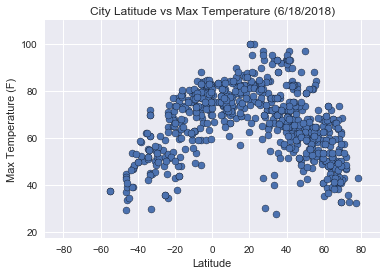

In [9]:
#import datetime for set the day the data was found
import datetime
#create a variable for the current time
now = datetime.datetime.now()

#create a scatter plot showing the Latitude vs Max Temp of each city
fig1, ax1 = plt.subplots()
ax1.scatter(city_data_complete["Lat"], city_data_complete["Max Temp"], edgecolors="black")
#set the x axis limits to the maximum and minimum latitude
ax1.set_xlim(-90, 90)
#set the y limits to just beyond the datasets max and min
ax1.set_ylim(min(city_data_complete["Max Temp"]-10), max(city_data_complete["Max Temp"]+10))
#label the axises
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (F)")
#Set the title of the plot using now to to get the month, day and year
ax1.set_title("City Latitude vs Max Temperature (" + str(now.month) + "/" + str(now.day) + "/" + str(now.year) + ")")
#save the figure
plt.savefig('LatVsMTemp.png', bbox_inches='tight')
#display the figure
plt.show("LatVsMTemp.png")

# Latitude vs Humidity Plot

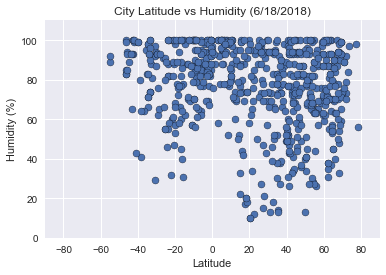

In [10]:
#create a scatter plot showing the Latitude vs Humidity of each city
fig2, ax2 = plt.subplots()
ax2.scatter(city_data_complete["Lat"],city_data_complete["Humidity"], edgecolors="black")
#set the x axis limits to the maximum and minimum latitude
ax2.set_xlim(-90,90)
#set the y limits to just beyond the datasets max and min
ax2.set_ylim(min(city_data_complete["Humidity"]-10), max(city_data_complete["Humidity"]+10))    
#label the axises
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")
#Set the title of the plot using now to to get the month, day and year
ax2.set_title("City Latitude vs Humidity (" + str(now.month) + "/" + str(now.day) + "/" + str(now.year) + ")")
#save the figure
plt.savefig('LatVsHumidity.png', bbox_inches='tight')
#display the figure
plt.show("LatVsHumidity.png")

# Latitude vs Cloudiness Plot 

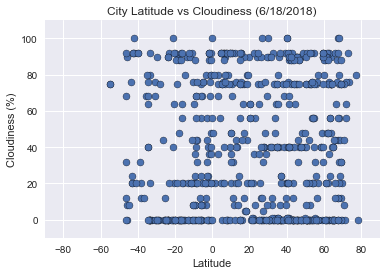

In [11]:
#create a scatter plot showing the Cloudiness vs Humidity of each city
fig3, ax3 = plt.subplots()
ax3.scatter(city_data_complete["Lat"],city_data_complete["Cloudiness"], edgecolors="black")
#set the x axis limits to the maximum and minimum latitude
ax3.set_xlim(-90,90)
#set the y limits to just beyond the datasets max and min
ax3.set_ylim(min(city_data_complete["Cloudiness"]-10), max(city_data_complete["Cloudiness"]+10))
#label the axises
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")
#Set the title of the plot using now to to get the month, day and year
ax3.set_title("City Latitude vs Cloudiness (" + str(now.month) + "/" + str(now.day) + "/" + str(now.year) + ")")
#save the figure
plt.savefig("LatVsCloudiness.png", bbox_inches='tight')
#display the figure
plt.show("LatVsCloudiness.png")

# Latitude vs Wind Speed Plot

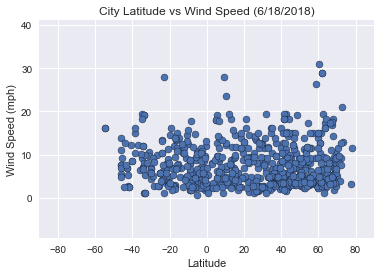

In [13]:
#create a scatter plot showing the Cloudiness vs Humidity of each city
fig4, ax4 = plt.subplots()
ax4.scatter(city_data_complete["Lat"], city_data_complete["Wind Speed"], edgecolors="black")
#set the x axis limits to the maximum and minimum latitude
ax4.set_xlim(-90,90)
#set the y limits to just beyond the datasets max and min
ax4.set_ylim(min(city_data_complete["Wind Speed"]-10), max(city_data_complete["Wind Speed"]+10))
#label the axises
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed (mph)")
#Set the title of the plot using now to to get the month, day and year
ax4.set_title("City Latitude vs Wind Speed (" + str(now.month) + "/" + str(now.day) + "/" + str(now.year) + ")")
#save the figure
plt.savefig("LatVsWindSpeed.png", bbox_inches='tight')
#display the figure
plt.show('LatVsWindSpeed.png')